# Praca domowa nr 3

## League of Legends vs Dota 2

In [1]:
import time
from time import sleep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import snscrape.modules.twitter as sntwitter
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import text2emotion as te

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets_lol = []
tweets_dota = []

month = ['01', '02', '03', '04', '05']
days = [32, 29, 32, 31, 32]

for j in range(3):
    for d in range(1, days[j]):
        if d <= 9:
            q1 = 'League of Legends lang:en until:2023-{}-0{}'.format(month[j], d)
            for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q1).get_items()):
                if i > 100:
                    break
                tweets_lol.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
            q2 = 'Dota lang:en until:2023-{}-0{}'.format(month[j], d)
            for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q2).get_items()):
                if i > 100:
                    break
                tweets_dota.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
        else:
            q1 = 'League of Legends lang:en until:2023-{}-{}'.format(month[j], d)
            for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q1).get_items()):
                if i > 100:
                    break
                tweets_lol.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
            q2 = 'Dota lang:en until:2023-{}-{}'.format(month[j], d)
            for i,tweet in enumerate(sntwitter.TwitterSearchScraper(q2).get_items()):
                if i > 100:
                    break
                tweets_dota.append([tweet.date, tweet.id, tweet.content, tweet.user.username])

# Creating a dataframe from the tweets list above
df1 = pd.DataFrame(tweets_lol, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
df2 = pd.DataFrame(tweets_dota, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

C:\Users\magda\AppData\Local\Temp\ipykernel_4492\978978657.py:14: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_lol.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
C:\Users\magda\AppData\Local\Temp\ipykernel_4492\978978657.py:19: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets_dota.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
Twitter responded with an error: TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Unspecified, TimeoutError: Timeout: Uns

In [3]:
df1

Datetime             Tweet Id  \
0    2022-12-31 23:59:04+00:00  1609338378734178306   
1    2022-12-31 23:57:03+00:00  1609337871273693184   
2    2022-12-31 23:54:27+00:00  1609337220128727041   
3    2022-12-31 23:53:33+00:00  1609336991635718144   
4    2022-12-31 23:52:31+00:00  1609336731836289027   
...                        ...                  ...   
9085 2023-03-30 22:53:11+00:00  1641574319191891968   
9086 2023-03-30 22:52:08+00:00  1641574057718972416   
9087 2023-03-30 22:51:38+00:00  1641573928811347969   
9088 2023-03-30 22:50:51+00:00  1641573731934846977   
9089 2023-03-30 22:49:33+00:00  1641573406440300544   

                                                   Text         Username  
0     #bloggers #newblogpost #blogger Oppo reno 7 pr...        NEWSBEEP2  
1     Manchester United legend Rio Ferdinand names A...         sanalnly  
2       @Wermux i'm afraid league of legends is winning           vuyecc  
3     Happy new year!!🎆🎊🎈 \nMythmaker Gwen \n#league...        liz_torta  
4     League of Legends Video Post\nLeague of Legend...  GAME_introduce7  
...                                                 ...              ...  
9085  Me during a League of Legends ranked match aft...          Duskade  
9086  Doing something i never do (soloq) in league o...         soeunbit  
9087  @arturo_mesirca @revert_aatrox @LeagueOfLegend...        nalkovius  
9088  @LeagueOfLegends Question: I know it’s happeni...          geckked  
9089  @dklmarxist getting head while sipping on a Le...  HolodomorVictim  

[9090 rows x 4 columns]

In [4]:
df2

Datetime             Tweet Id  \
0    2022-12-31 23:40:59+00:00  1609333828442636289   
1    2022-12-31 23:40:57+00:00  1609333822813872129   
2    2022-12-31 23:35:51+00:00  1609332536769138693   
3    2022-12-31 23:34:39+00:00  1609332235278196737   
4    2022-12-31 23:29:47+00:00  1609331010143145984   
...                        ...                  ...   
9085 2023-03-30 17:40:55+00:00  1641495734443728903   
9086 2023-03-30 17:40:50+00:00  1641495712692068376   
9087 2023-03-30 17:39:08+00:00  1641495287519940608   
9088 2023-03-30 17:31:30+00:00  1641493364804829184   
9089 2023-03-30 17:27:56+00:00  1641492469161373707   

                                                   Text         Username  
0         I am dota 2 and the freddy from drs  -  Casey     brentnallbot  
1     PC | Mostly Auto Battle B/C I have Other $HIT ...  TheSaltyMergosa  
2     @robo_dota There's still patches of white blon...  RawrMeansIWuvU_  
3     @YogiTheWise @SHPIDEN watched a lot of Dota ST...           soaroz  
4     @xiinya_jp @NobbyNobbs10 all the mechanics fro...    meganekun0825  
...                                                 ...              ...  
9085                                 Must acquire these  Morticians_Dota  
9086                 @Thejoyceking DOTA: Dragon’s Blood    kinguthegreat  
9087  .@IMG Continues @pglesports Partnership For Do...  SportsTechieNET  
9088                The Queen beat Ringo Starr at Dota.       WittyBot03  
9089  @DaddyWarpig i've seen this happen when you sp...   SpeaKEaSY_DotA  

[9090 rows x 4 columns]

### Preprocessing
1. Zamiana dużych liter na małe
2. Tokenizacja
3. Usunięcie stopwords
4. Lematyzacja

In [2]:
#df1 = pd.read_csv("liga.csv")
#df2 = pd.read_csv("dota.csv")

In [3]:
df1["Text"] = df1["Text"].apply(lambda x: x.lower())
df2["Text"] = df2["Text"].apply(lambda x: x.lower())

df1["Tokens"] = df1.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1)
df2["Tokens"] = df2.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1)

df1["Tokens"] = df1["Tokens"].apply(lambda x: [item for item in x if not '//' in item])
df2["Tokens"] = df2["Tokens"].apply(lambda x: [item for item in x if not '//' in item])

stop_words = set(nltk.corpus.stopwords.words("english"))
additional = [".", ",", ":", ";", "'s", "``", "\''", "(", ")", "@", "[", "]", "#", "https"]
stop_words.update(additional)
df1["Tokens"] = df1["Tokens"].apply(lambda x: [y for y in x if y not in stop_words])
df2["Tokens"] = df2["Tokens"].apply(lambda x: [y for y in x if y not in stop_words])

lemmatizer = WordNetLemmatizer()
df1["Tokens"] = df1["Tokens"].apply(lambda x: [lemmatizer.lemmatize(item, pos='v') for item in x])
df2["Tokens"] = df2["Tokens"].apply(lambda x: [lemmatizer.lemmatize(item, pos='v') for item in x])

df1["Tokens"] = df1["Tokens"].apply(lambda words: ' '.join(words))
df2["Tokens"] = df2["Tokens"].apply(lambda words: ' '.join(words))

In [4]:
df1.to_csv("liga.csv")
df2.to_csv("dota.csv")

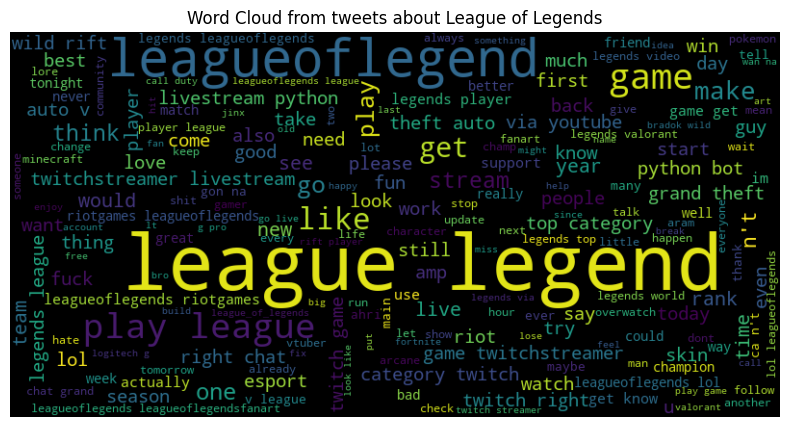

In [5]:
text = " ".join(i for i in df1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from tweets about League of Legends')
plt.show()
# Możemy znaleźć takie słowa jak: like, fun, stream, top category, skin, champion, esport

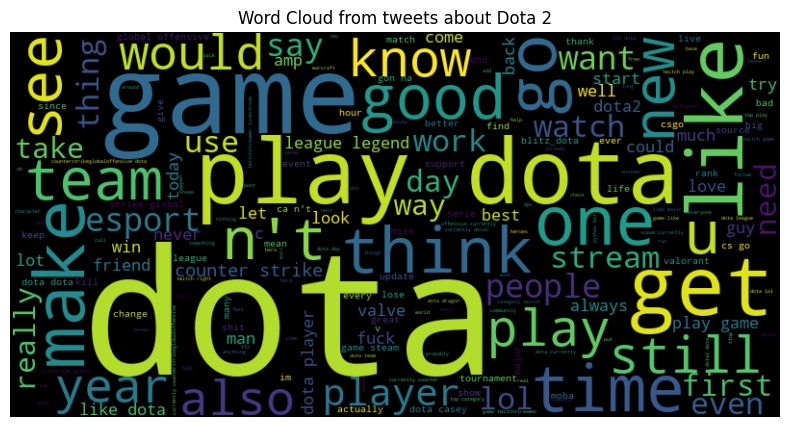

In [6]:
text = " ".join(i for i in df2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from tweets about Dota 2')
plt.show()
# Chmura słów dla Doty ma dużo większe słowa. To znaczy, że częściej się powtarzają i tweety są zdecydowanie mniej
# zróżnicowane.
# Możemy znaleźć takie słowa jak: good, like, make, team, esport, still, time
# W porównaniu to chmury LoLa, Dota nie widać tu tak częstych słów: stream, twitch, livestream, youtube, video

### Analiza całościowa
1. Analiza sentymentu
2. Analiza emocji

In [7]:
sia = SentimentIntensityAnalyzer()
df1["Sentiment"] = df1["Tokens"].apply(lambda x: sia.polarity_scores(x)['compound'])
df2["Sentiment"] = df2["Tokens"].apply(lambda x: sia.polarity_scores(x)['compound'])

In [8]:
df1n = df1.query('Sentiment < 0.0')
df1p = df1.query('Sentiment > 0.0')
df2n = df2.query('Sentiment < 0.0')
df2p = df2.query('Sentiment > 0.0')
df1neu = df1.query('Sentiment == 0.0')
df2neu = df2.query('Sentiment == 0.0')

In [9]:
print(len(df1n), len(df1p))
print(len(df2n), len(df2p))

1723 4384
1994 4681


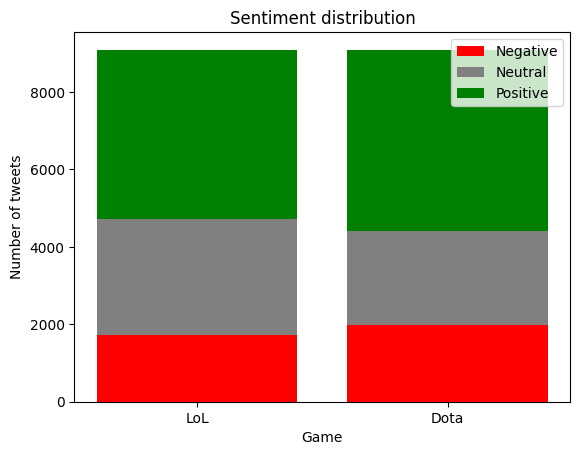

In [10]:
x = ['LoL', 'Dota']
y1 = np.array([len(df1n),len(df2n)])
y2 = np.array([len(df1neu),len(df2neu)])
y3 = np.array([len(df1p),len(df2p)])
 
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='gray')
plt.bar(x, y3, bottom=y1+y2, color='g')
plt.xlabel("Game")
plt.ylabel("Number of tweets")
plt.legend(["Negative", "Neutral", "Positive"])
plt.title("Sentiment distribution")
plt.show()
# Dota ma więcej negatywnych tweetów, ale też i pozytywnych.

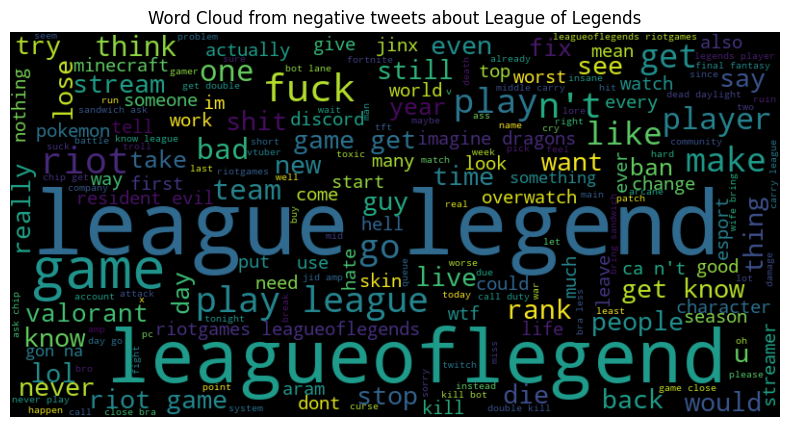

In [11]:
text = " ".join(i for i in df1n.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from negative tweets about League of Legends')
plt.show()
# Widzimy słowa riot (firma, która wyprodukowała LoLa), hate, rank, season, fix, a także imię postaci Jinx

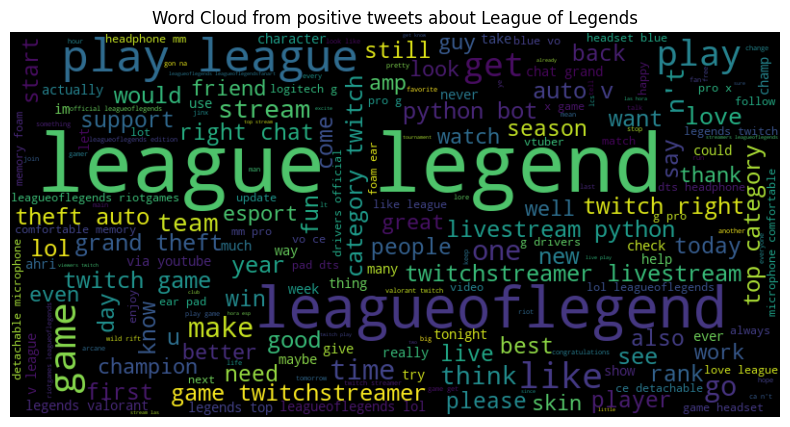

In [12]:
text = " ".join(i for i in df1p.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from positive tweets about League of Legends')
plt.show()
# Widzimy słowa good, fun, well, love, skin, friend
# Wcześniej zauważone słowa stream i twitch pojawiły się na pozytywnej chmurze, co wskazuje na zadowolenie
# z owej treści

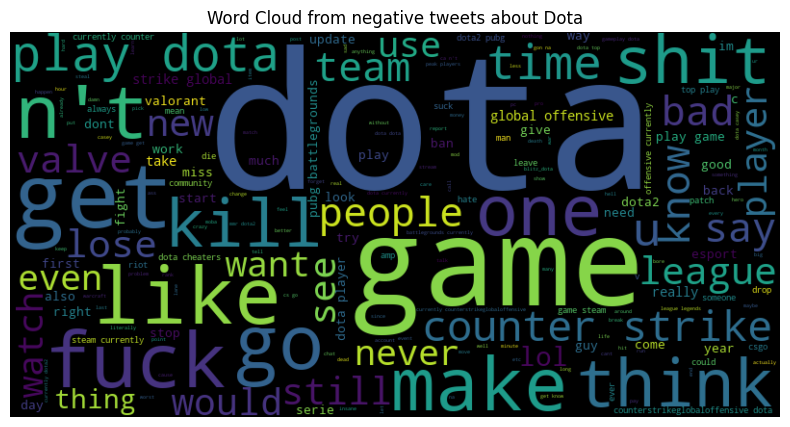

In [13]:
text = " ".join(i for i in df2n.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from negative tweets about Dota')
plt.show()
# Możemy zauważyć słowo like, mimo tego, że jest to chmura dla negatywnych tweetów
# Widzimy też słowa never, make, think, get, lose, peaople, team, bad

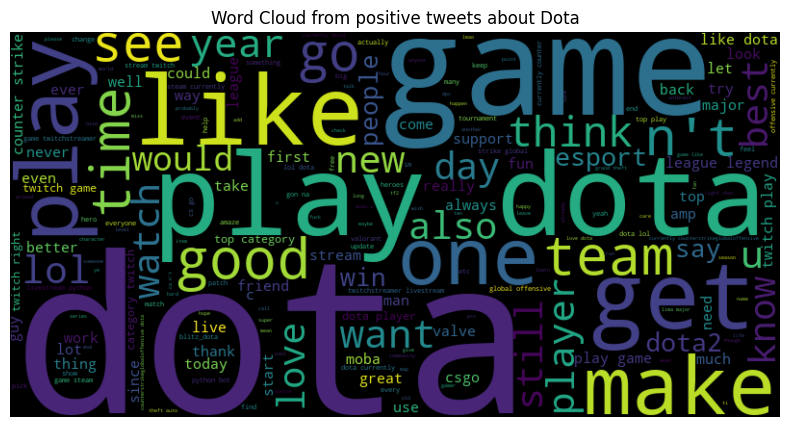

In [14]:
text = " ".join(i for i in df2p.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from positive tweets about Dota')
plt.show()
# Widzimy słowa play, good, love, still, esport

In [15]:
df1["Emotion"] = df1["Tokens"].apply(lambda x: te.get_emotion(x))
df1["Happy"] = df1["Emotion"].apply(lambda x: x['Happy'])
df1["Angry"] = df1["Emotion"].apply(lambda x: x['Angry'])
df1["Surprise"] = df1["Emotion"].apply(lambda x: x['Surprise'])
df1["Sad"] = df1["Emotion"].apply(lambda x: x['Sad'])
df1["Fear"] = df1["Emotion"].apply(lambda x: x['Fear'])

df2["Emotion"] = df2["Tokens"].apply(lambda x: te.get_emotion(x))
df2["Happy"] = df2["Emotion"].apply(lambda x: x['Happy'])
df2["Angry"] = df2["Emotion"].apply(lambda x: x['Angry'])
df2["Surprise"] = df2["Emotion"].apply(lambda x: x['Surprise'])
df2["Sad"] = df2["Emotion"].apply(lambda x: x['Sad'])
df2["Fear"] = df2["Emotion"].apply(lambda x: x['Fear'])

In [16]:
mxinx1 = df1[['Happy','Angry','Surprise','Sad','Fear']].idxmax(axis=1)
mxinx2 = df2[['Happy','Angry','Surprise','Sad','Fear']].idxmax(axis=1)
l1 = []
l2 = []
for i in range(len(df1)):
    l1.append(mxinx1[i])
for i in range(len(df2)):
    l2.append(mxinx2[i])
df1['Max'] = l1
df2['Max'] = l2

In [17]:
happy1 = df1.query('Max == "Happy"')
angry1 = df1.query('Max == "Angry"')
surprise1 = df1.query('Max == "Surprise"')
sad1 = df1.query('Max == "Sad"')
fear1 = df1.query('Max == "Fear"')

happy2 = df2.query('Max == "Happy"')
angry2 = df2.query('Max == "Angry"')
surprise2 = df2.query('Max == "Surprise"')
sad2 = df2.query('Max == "Sad"')
fear2 = df2.query('Max == "Fear"')

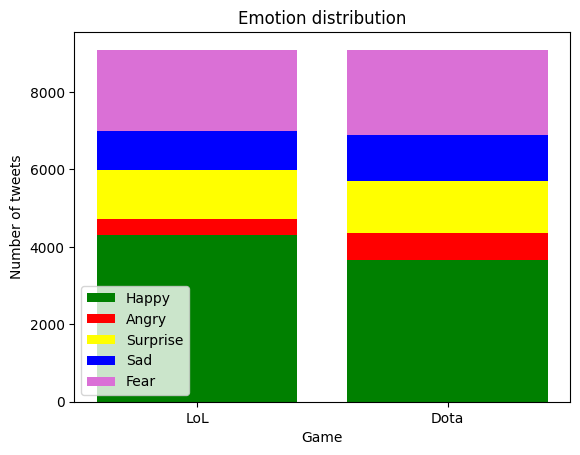

In [18]:
x = ['LoL', 'Dota']
y1 = np.array([len(happy1),len(happy2)])
y2 = np.array([len(angry1),len(angry2)])
y3 = np.array([len(surprise1),len(surprise2)])
y4 = np.array([len(sad1),len(sad2)])
y5 = np.array([len(fear1),len(fear2)])

c = ['green', 'red', 'yellow', 'blue', 'orchid']
plt.bar(x, y1, color=c[0])
plt.bar(x, y2, bottom=y1, color=c[1])
plt.bar(x, y3, bottom=y1+y2, color=c[2])
plt.bar(x, y4, bottom=y1+y2+y3, color=c[3])
plt.bar(x, y5, bottom=y1+y2+y3+y4, color=c[4])
plt.xlabel("Game")
plt.ylabel("Number of tweets")
plt.legend(["Happy", "Angry", "Surprise", "Sad", "Fear"])
plt.title("Emotion distribution")
plt.show()
# Więcej szczęśliwych tweetów ma Liga Legend, natomiast Dota ma więcej złych i smutnych.

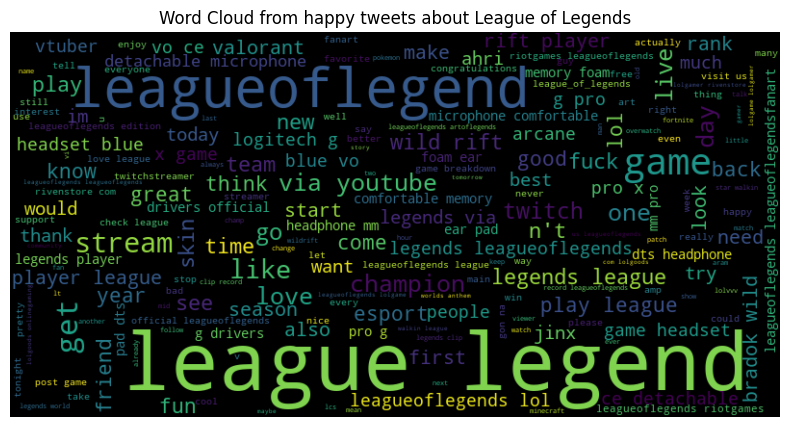

In [19]:
text = " ".join(i for i in happy1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from happy tweets about League of Legends')
plt.show()
# Widzimy słowa like, love, stream, headphone, microphone, logitech, esport
# Arcane to serial opowiadający historię postaci z gry, m.in. Jinx.

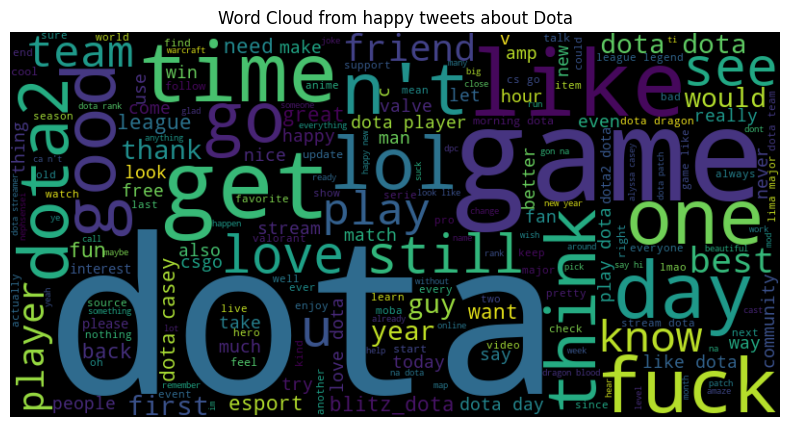

In [20]:
text = " ".join(i for i in happy2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from happy tweets about Dota')
plt.show()
# Widzimy słowa love, good, time, play, best, friend

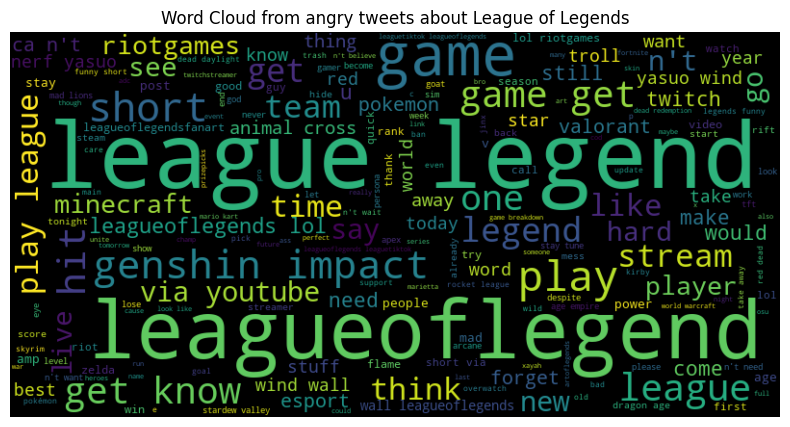

In [21]:
text = " ".join(i for i in angry1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from angry tweets about League of Legends')
plt.show()
# Widzimy nazwy kilku innych gier, a także wind wall, yasuo wind i nerf yasuo

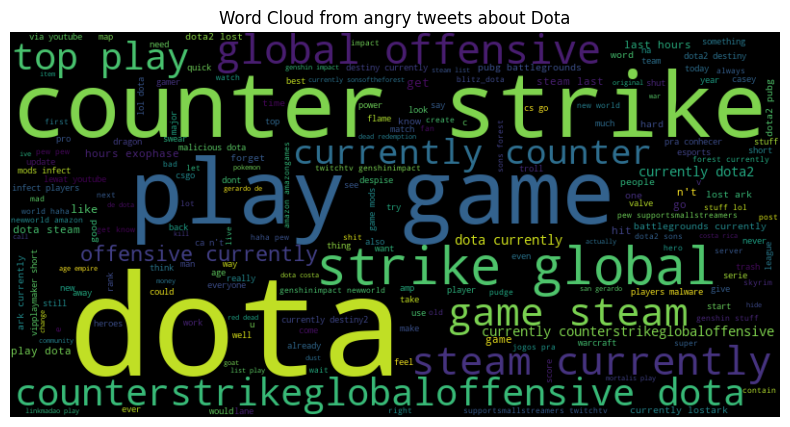

In [22]:
text = " ".join(i for i in angry2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from angry tweets about Dota')
plt.show()
# Counter strike pojawia się nawet częściej niż dota (pojawia się kilka razy w różnych formach)

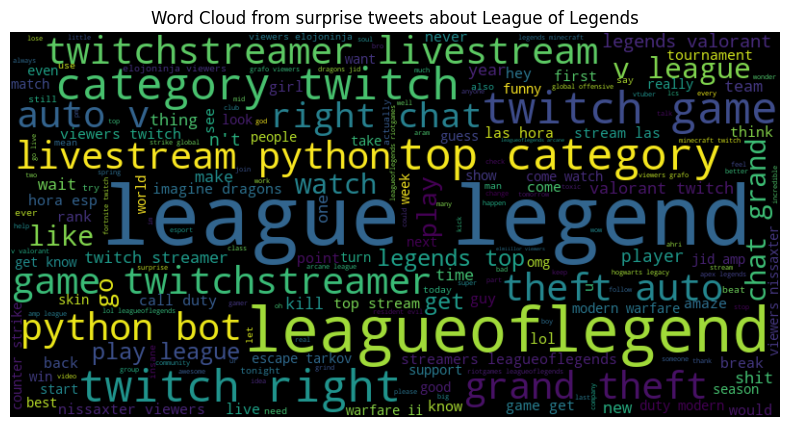

In [23]:
text = " ".join(i for i in surprise1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from surprise tweets about League of Legends')
plt.show()
# Zdecydowanie najczęściej powtarza się twitch i stream

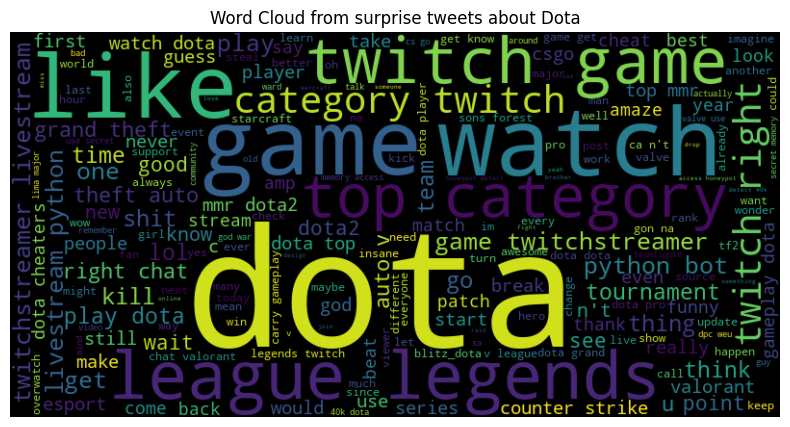

In [24]:
text = " ".join(i for i in surprise2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from surprise tweets about Dota')
plt.show()
# Pierwsza chmura dla Doty, na której widać dużo mniejszych słów. Tweety przejawiające zdziwienie są bardziej
# zróżnicowane.

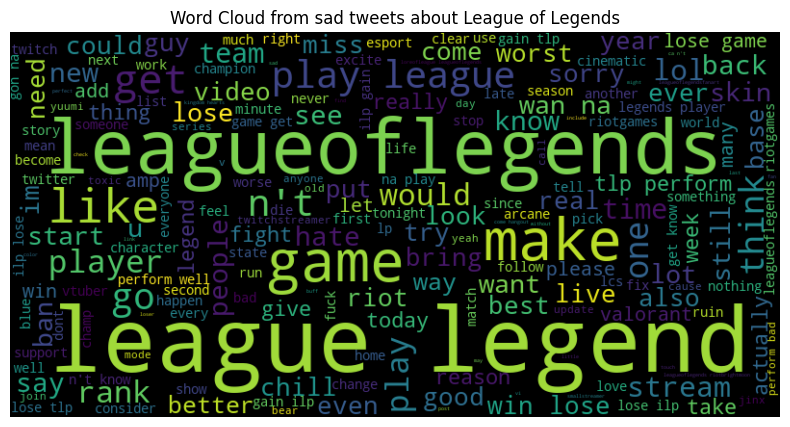

In [25]:
text = " ".join(i for i in sad1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from sad tweets about League of Legends')
plt.show()
# Widzimy słowa lose, riot, arcane, ruin, miss

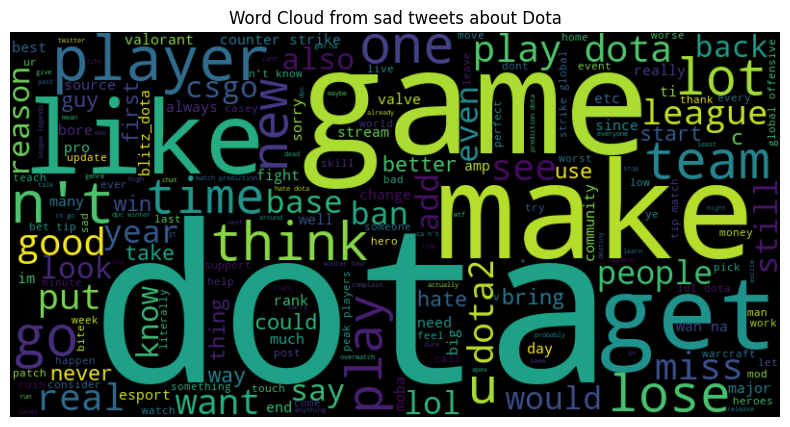

In [26]:
text = " ".join(i for i in sad2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from sad tweets about Dota')
plt.show()
# Widzimy słowa like, lose, miss

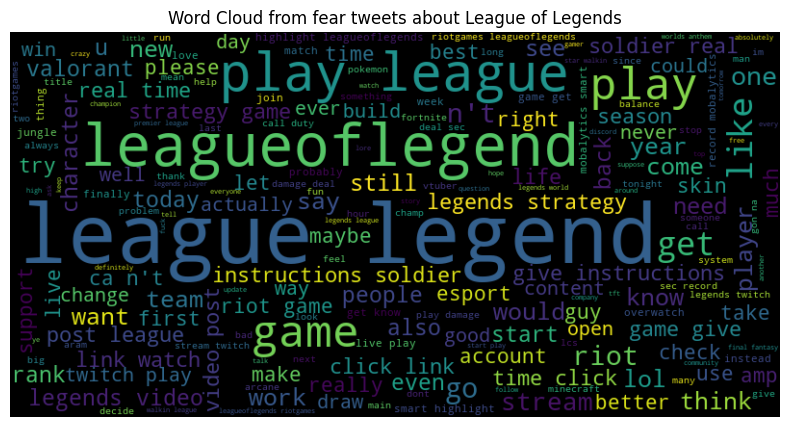

In [27]:
text = " ".join(i for i in fear1.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from fear tweets about League of Legends')
plt.show()
# Widzimy słowa account, esport, strategy, build, instructions i soldier

In [36]:
# skąd się wzięło soldier
print(df1["Text"][4])
df1[df1["Tokens"].str.contains('soldier')] 

league of legends video post
league of legends:a strategy game that gives instructions to soldiers in real time.
click the link below to watch now:

1:https://t.co/ou3ccyf9u6
2:https://t.co/ya0lvmfjkj
3:https://t.co/4viunzvb52


Unnamed: 0                   Datetime             Tweet Id  \
4              4  2022-12-31 23:52:31+00:00  1609336731836289027   
73            73  2022-12-31 22:52:36+00:00  1609321653820968962   
110          110  2023-01-01 23:52:35+00:00  1609699135283773443   
172          172  2023-01-01 22:52:32+00:00  1609684025924325378   
212          212  2023-01-02 23:52:34+00:00  1610061519206621184   
282          282  2023-01-02 22:52:32+00:00  1610046412158271488   
309          309  2023-01-03 23:52:37+00:00  1610423919554564096   
379          379  2023-01-03 22:52:35+00:00  1610408811201810437   
415          415  2023-01-04 23:52:30+00:00  1610786278873747457   
499          499  2023-01-04 22:52:33+00:00  1610771192717123585   
519          519  2023-01-05 23:52:32+00:00  1611148673076928513   
619          619  2023-01-06 23:52:34+00:00  1611511072074121218   
692          692  2023-01-06 22:52:32+00:00  1611495965403369479   
715          715  2023-01-07 23:52:30+00:00  1611873442520858626   
814          814  2023-01-08 23:52:30+00:00  1612235830441005056   
882          882  2023-01-08 22:52:30+00:00  1612220729348526082   
929          929  2023-01-09 23:52:36+00:00  1612598242159517696   
1055        1055  2023-01-10 23:52:36+00:00  1612960632868933633   
1132        1132  2023-01-11 23:52:32+00:00  1613323001021304833   
1224        1224  2023-01-12 23:52:34+00:00  1613685397577469954   
1398        1398  2023-01-13 23:52:30+00:00  1614047768087076866   
1421        1421  2023-01-14 23:52:34+00:00  1614410174340423682   
1525        1525  2023-01-15 23:52:33+00:00  1614772556975718400   
1627        1627  2023-01-16 23:52:32+00:00  1615134941146128384   
1734        1734  2023-01-17 23:52:32+00:00  1615497330458771457   
1826        1826  2023-01-18 23:52:32+00:00  1615859715497394179   
1904        1904  2023-01-18 22:52:36+00:00  1615844634307039232   
2008        2008  2023-01-19 22:52:31+00:00  1616207002400657415   
2028        2028  2023-01-20 23:52:32+00:00  1616584491404857347   
2136        2136  2023-01-21 23:52:36+00:00  1616946897847042050   
2204        2204  2023-01-21 22:52:32+00:00  1616931780535132160   
2226        2226  2023-01-22 23:52:32+00:00  1617309268977324033   
2236        2236  2023-01-22 23:48:40+00:00  1617308295563468800   
2316        2316  2023-01-22 22:52:30+00:00  1617294159064322050   
2417        2417  2023-01-23 22:52:34+00:00  1617656565141471234   
2443        2443  2023-01-24 23:52:37+00:00  1618034067504594944   
2533        2533  2023-01-25 23:52:38+00:00  1618396456301232128   
2636        2636  2023-01-26 23:52:29+00:00  1618758807328362496   
2738        2738  2023-01-27 23:52:33+00:00  1619121214152216577   
2840        2840  2023-01-28 23:52:35+00:00  1619483606614695938   
2926        2926  2023-01-28 22:52:30+00:00  1619468486614388736   
2933        2933  2023-01-29 23:52:30+00:00  1619845976230969349   
3012        3012  2023-01-29 22:52:31+00:00  1619830881979359235   
3139        3139  2023-01-31 23:52:31+00:00  1620570753631502344   
3222        3222  2023-01-31 22:52:32+00:00  1620555662106284034   
3244        3244  2023-02-01 23:52:32+00:00  1620933148149256192   
3339        3339  2023-02-02 23:52:35+00:00  1621295547037392896   
3441        3441  2023-02-03 23:52:30+00:00  1621657915479232512   
3525        3525  2023-02-03 22:52:31+00:00  1621642819923230725   
3540        3540  2023-02-04 23:52:34+00:00  1622020318209445891   
3634        3634  2023-02-04 22:52:31+00:00  1622005206895443968   
3644        3644  2023-02-05 23:52:31+00:00  1622382693366513664   
3763        3763  2023-02-06 23:52:32+00:00  1622745086625808387   
4452        4452  2023-02-13 23:52:35+00:00  1625281812481077248   
5968        5968  2023-02-28 23:52:30+00:00  1630717611204919296   

                                                   Text         Username  \
4     league of legends video post\nleague of legend...  GAME_introduce7   
73    league of legends video post\nleague of

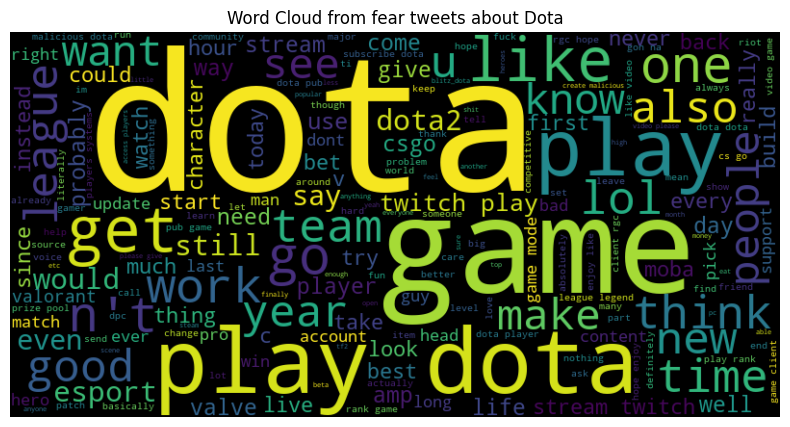

In [28]:
text = " ".join(i for i in fear2.Tokens)
wordcloud = WordCloud(stopwords=stop_words, width=800, height=400).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud from fear tweets about Dota')
plt.show()
# Widzimy słowa esport, update, stream, twitch

### Analiza czasowa

In [29]:
a1 = df1.query('"2023-01-01 00:00:00+00:00" <= Datetime < "2023-01-15 00:00:00+00:00"')
a2 = df1.query('"2023-01-15 00:00:00+00:00" <= Datetime < "2023-01-29 00:00:00+00:00"')
a3 = df1.query('"2023-01-29 00:00:00+00:00" <= Datetime < "2023-02-12 00:00:00+00:00"')
a4 = df1.query('"2023-02-12 00:00:00+00:00" <= Datetime < "2023-02-26 00:00:00+00:00"')
a5 = df1.query('"2023-02-26 00:00:00+00:00" <= Datetime < "2023-03-12 00:00:00+00:00"')
a6 = df1.query('"2023-03-12 00:00:00+00:00" <= Datetime < "2023-03-26 00:00:00+00:00"')
a7 = df1.query('"2023-03-26 00:00:00+00:00" <= Datetime < "2023-04-09 00:00:00+00:00"')
a8 = df1.query('"2023-04-09 00:00:00+00:00" <= Datetime < "2023-04-23 00:00:00+00:00"')
a9 = df1.query('"2023-04-23 00:00:00+00:00" <= Datetime < "2023-05-07 00:00:00+00:00"')
a10 = df1.query('"2023-05-07 00:00:00+00:00" <= Datetime < "2023-05-21 00:00:00+00:00"')
a11 = df1.query('"2023-05-21 00:00:00+00:00" <= Datetime < "2023-06-01 00:00:00+00:00"')
b1 = df2.query('"2023-01-01 00:00:00+00:00" <= Datetime < "2023-01-15 00:00:00+00:00"')
b2 = df2.query('"2023-01-15 00:00:00+00:00" <= Datetime < "2023-01-29 00:00:00+00:00"')
b3 = df2.query('"2023-01-29 00:00:00+00:00" <= Datetime < "2023-02-12 00:00:00+00:00"')
b4 = df2.query('"2023-02-12 00:00:00+00:00" <= Datetime < "2023-02-26 00:00:00+00:00"')
b5 = df2.query('"2023-02-26 00:00:00+00:00" <= Datetime < "2023-03-12 00:00:00+00:00"')
b6 = df2.query('"2023-03-12 00:00:00+00:00" <= Datetime < "2023-03-26 00:00:00+00:00"')
b7 = df2.query('"2023-03-26 00:00:00+00:00" <= Datetime < "2023-04-09 00:00:00+00:00"')
b8 = df2.query('"2023-04-09 00:00:00+00:00" <= Datetime < "2023-04-23 00:00:00+00:00"')
b9 = df2.query('"2023-04-23 00:00:00+00:00" <= Datetime < "2023-05-07 00:00:00+00:00"')
b10 = df2.query('"2023-05-07 00:00:00+00:00" <= Datetime < "2023-05-21 00:00:00+00:00"')
b11 = df2.query('"2023-05-21 00:00:00+00:00" <= Datetime < "2023-06-01 00:00:00+00:00"')

In [30]:
a = [a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11]
b = [b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11]
m1 = []
m2 = []
for i in range(len(a)):
    m1.append(round(a[i]['Sentiment'].mean(),4))
    m2.append(round(b[i]['Sentiment'].mean(),4))

In [31]:
daty= ['2023-01-15', '2023-01-29', '2023-02-12', '2023-02-26', '2023-03-12', '2023-03-26', '2023-04-09', '2023-04-23', '2023-05-07', '2023-05-21', '2023-05-31']

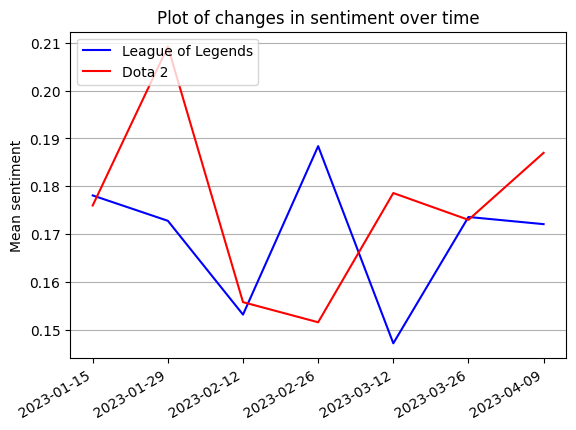

In [32]:
dfs1 = pd.DataFrame(data = {'val': m1}, index = daty)
dfs2 = pd.DataFrame(data = {'val': m2}, index = daty)
plt.plot(dfs1, color='blue', label='League of Legends')
plt.plot(dfs2, color='red', label='Dota 2')
plt.grid(axis='y')
plt.legend(loc="upper left")
plt.title('Plot of changes in sentiment over time')
plt.ylabel('Mean sentiment')
plt.gcf().autofmt_xdate()
plt.show()
# Średni sentyment dla obu gier jest pozytywny, ale widzimy duże wahania.
# Oprócz okresu od połowy lutego do połowy marca Dota ma bardziej pozytywne tweety niż Liga Legend.
# Liga miała wtedy aktualizacje 13.4 i 13.5

In [33]:
h1 = []
h2 = []
an1 = []
an2 = []
su1 = []
su2 = []
sa1 = []
sa2 = []
f1 = []
f2 = []
for i in range(len(a)):
    h1.append(round(a[i]['Happy'].mean(),4))
    h2.append(round(b[i]['Happy'].mean(),4))
    an1.append(round(a[i]['Angry'].mean(),4))
    an2.append(round(b[i]['Angry'].mean(),4))
    su1.append(round(a[i]['Surprise'].mean(),4))
    su2.append(round(b[i]['Surprise'].mean(),4))
    sa1.append(round(a[i]['Sad'].mean(),4))
    sa2.append(round(b[i]['Sad'].mean(),4))
    f1.append(round(a[i]['Fear'].mean(),4))
    f2.append(round(b[i]['Fear'].mean(),4))

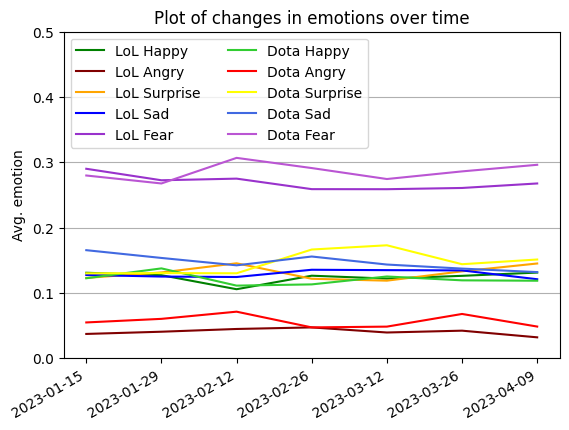

In [37]:
dfh1 = pd.DataFrame(data = {'val': h1}, index = daty)
dfh2 = pd.DataFrame(data = {'val': h2}, index = daty)
dfan1 = pd.DataFrame(data = {'val': an1}, index = daty)
dfan2 = pd.DataFrame(data = {'val': an2}, index = daty)
dfsu1 = pd.DataFrame(data = {'val': su1}, index = daty)
dfsu2 = pd.DataFrame(data = {'val': su2}, index = daty)
dfsa1 = pd.DataFrame(data = {'val': sa1}, index = daty)
dfsa2 = pd.DataFrame(data = {'val': sa2}, index = daty)
dff1 = pd.DataFrame(data = {'val': f1}, index = daty)
dff2 = pd.DataFrame(data = {'val': f2}, index = daty)

plt.plot(dfh1, color='green', label='LoL Happy')
plt.plot(dfan1, color='maroon', label='LoL Angry')
plt.plot(dfsu1, color='orange', label='LoL Surprise')
plt.plot(dfsa1, color='blue', label='LoL Sad')
plt.plot(dff1, color='darkorchid', label='LoL Fear')

plt.plot(dfh2, color='limegreen', label='Dota Happy')
plt.plot(dfan2, color='red', label='Dota Angry')
plt.plot(dfsu2, color='yellow', label='Dota Surprise')
plt.plot(dfsa2, color='royalblue', label='Dota Sad')
plt.plot(dff2, color='mediumorchid', label='Dota Fear')

plt.ylim([0, 0.5])
plt.grid(axis='y')
plt.legend(loc="upper left", ncol=2)
plt.title('Plot of changes in emotions over time')
plt.ylabel('Avg. emotion')
plt.gcf().autofmt_xdate()
plt.show()
# Dla każdej z emocji Dota ma wyższe średnie niż LoL.
# Możemy zauważyć, że smutek dla Doty spadł od początku roku, za to od końca lutego,
# nie licząc strachu, zaskoczenie miało nanwiększą średnią. Od początku lutego strach wzrósł.
# Natomiast dla Ligi Legend emocje nie mają tak dużych wahań.

In [37]:
df1.to_csv("data/liga.csv")
df2.to_csv("data/dota.csv")